**Avik Samanta**  [Github](https://github.com/avik-samanta99)<br>
DETS (Kalyani University)<br>
Recommender system notebook<br>
**Dataset** :- Kaggle's MovieLens small 100k dataset <br>
Github link : [Note book](https://github.com/avik-samanta99/MovieRecommenderSystem)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **A recommender system or a recommendation system (sometimes replacing "system" with a synonym such as platform or engine) is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.They are primarily used in commercial applications bold text** <br>
In this system we have a large no of user vs Movie Id data where, users rated more than one movie according to their preference and system will find some ralation between more than one user and more than one movies and find a abstract function that can try to predict rating for a movie which are not rated by user and according to the rating we will recommend those movies to same user, that may like according to their activity of rating 

In [ ]:
# Importing Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
from random import uniform
import time
from random import randint
np.set_printoptions(precision=4)
import random
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#loading data
data=pd.read_csv("drive/My Drive/Colab Notebooks/Recommended System/ratingsEx.csv")

In [ ]:
data.sample(10)

,userId,movieId,rating
73961,474,3066,3.0
25532,177,45081,1.0
48233,312,5881,4.0
38533,265,592,3.0
94113,599,6188,3.0
9543,64,1183,4.0
30558,213,5419,3.0
30243,211,57669,4.5
27969,191,235,5.0
44537,298,16,4.0


In [ ]:
# change column name
data.columns=['userID','movieID','rating']
data.shape

(100836, 3)

Text(0.5, 1.0, 'Distribution of rating')

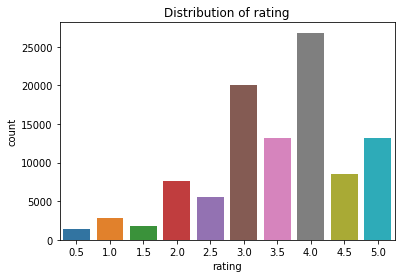

In [ ]:

sns.countplot(x='rating',data = data)
plt.title('Distribution of rating')

In [ ]:
# the no of user and Movie

print("Total no of User:- ",len(set(data['userID'])))
print("Total no of movies",len(set(data['movieID'])))

Total no of User:-  610
Total no of movies 9724


In [ ]:
# this is the Rating matrix that contain column is user and rows is movies
"""    | movie1 | movie2 | movie3 
 user1  |   5    |    4   |    1
 user2  |   3    |        |    5
 user3  |   5    |    3   |    
  
"""
# the R matrix is boolean matrix that denote user rated that movie or not
print()

There are 610 users which have rated a least one movie with (0-5) rating parameter. And there are 9724 movies that is rated by the users.<br>
This system is using **Matrix factorization** technique to predict users for particular user which haven't rated those users.<br>
# Matrix factorization

![alt text](https://cdn-images-1.medium.com/max/1600/1*Zhm1NMlmVywn0G18w3exog.png)

###**The above image does an excellent job of summarizing, the core idea behind matrix factorization. Let there be matrix A with dimensionality of (m,n) this matrix can be viewed as a dot product between two matrix with each matrices having dimensions of (m,k) and (k,n).**

##Matrix factorization is a class of collaborative filtering algorithms used in recommender systems. Matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.<br>

---

If we use matrix method to store the rating so it take 610 * 9724 <br>
Total entry is about **6000000**.which will take about **356 MB** of RAM if we load the whole matrix at a time in RAM.
So, there are several aternative to take of these problem<br>

1.   Read in a chunk
2. Process the chunk
3. Save the results of the chunk
4. Repeat steps 1 to 3 until we have all chunk results
5. Combine the chunk results

But as a good knowledge of Alorithm and datastructure we will take care which out using any type of chunk. we store the matrix in Dictionary. Because, given matrix is sparse matrix and we need to handle only 610 of user and movies combination so Dictionary will play a important role.

In [ ]:
Rating = dict()
for i in range(100836):
  Rating[(data['userID'][i],data['movieID'][i])] = data['rating'][i]
  if i%10000==0:
    clear_output(wait=True)
    print("complete :- ",i/(1000))

complete :-  100.0


We don't know about the features of different movies and what type of movies a user like and dislike. We have only rating by a users <br>
Lets sppose ***user 1*** give 5 start to ***movie x*** and <br>
 ***user 2*** also give 5 star to ***movie x***<br>,so by only two rating we can conclude that somehow ***user 1*** and ***user 2*** have similar interest.<br>
 And if ***user 1*** rated a ***movie y*** to 4 star, So there is large probability that ***user 2*** will also rated ***movie y*** to 4 
 

---

So that we assume some features of movies, on the basis of that features a user will predict its rating.<br>
Only asigning features for a movie will not help much but we have also some parameters that for a user too.<br>
Both the feature of the movies and parameters of a user can solve our problem.<br>
And one more things both the parameter and the feature are same in numbers but may different in values.<br>
We assigning 5 features for movies and 5 parameters for a user and set a small random value for both features and parameters

example:-           

1.   Action
2.   romance
3. sci-fi
4. documentry
5. comedy

***We will assign a random value for each categories in User And movies Features***


---


Total no of User is 610 and Songs is 9724 <br> 
So we create two matrix    USER (610  ,  5) and Song  (9724, 5)

In [ ]:
def randomR():
  return round(randint(0,100)/randint(200,300),3)

**Assigning Random variable to the features and parameters**

In [ ]:

USERS = np.array([[randomR() for i in range(5)] for i in range(611)],dtype=np.float128)
MOVIES = np.array([[randomR() for i in range(5)] for i in range(9725)],dtype=np.float128)

***OUR GOAL***

We need to find dot product of the features and parameters of a user and a movies to find approximate rating, and accoring to the error we got, we will modify the both features and parameters .<br>
We will repeat this step until the error will minimize<br>
After the minimization of error we got some specific value in features and parameters. And that help to predict the unrated movies.

### SPLIT DATASET
we have datas, store in dictionary. So,and they must be split in two dictionary one is Train set and another is Test set <br>
Train set is used to train the model for each Users and Songs, and <br>
Test set is used to calcutale the Accuracy of the model .

In [ ]:
def splitTrainTest(Dic,x):
    S=list(range(len(Dic)))
    S=set(random.sample(S,int(len(Dic)*x)))
    TrainR={}
    TestR={}
    index=0
    for i in Dic:
        if index in S:
            TestR[i] = Dic[i]
        else:
            TrainR[i] = Dic[i]
        index+=1
    return TrainR,TestR

In [ ]:
TrainSet,TestSet = splitTrainTest(Rating,0.3)

In [ ]:
len(TrainSet),len(TestSet)

(70586, 30250)

###Index in Dictonary are IDs
Indexof dictionary are UserID and MovieID but index in parameter and features are integer so we must have to built a hash function with track the record of index with IDs<br>


In [ ]:
# Indexing for each USERS and SONGS
User=list(set(data['userID']))
Movie=list(set(data['movieID']))
U=dict()
M=dict()
for i in range(len(User)):
    U[User[i]]=i
for i in range(len(Movie)):
    M[Movie[i]]=i


In [ ]:
# set parameters and learning rate
alpha = 0.01
lamda = 0.03


In [ ]:
def Test():
    Accuracy=0
    n=len(TestSet)
    for x in TestSet:
        i=U[x[0]]
        j=M[x[1]]
        d= sum(USERS[i,:] * MOVIES[j,:])- Rating[x]
        Accuracy += d**2
    return  (Accuracy/n)**(0.5)


In [ ]:
def Train():
    Accuracy=0
    n=len(TrainSet)
    for x in TrainSet:
        i=U[x[0]]
        j=M[x[1]]
        d= sum(USERS[i,:] * MOVIES[j,:])- Rating[x]
        Accuracy += d**2
    return (Accuracy/n)**(0.5)

In [ ]:
#learning with collaborating Filtering
USERS = np.array([[randomR() for i in range(5)] for i in range(610)],dtype=np.float128)
MOVIES = np.array([[randomR() for i in range(5)] for i in range(9724)],dtype=np.float128)
E=[]
Et=[]
tm=0
n=len(TrainSet)
for itr in range(25):
    #error=0
    t=time.time()
    for x in TrainSet:
        i=U[x[0]]
        j=M[x[1]]
        USERS[i,:] =  USERS[i,:] - alpha * (  (sum(USERS[i,:] * MOVIES[j,:]) - Rating[x]) * MOVIES[j,:] + lamda * USERS[i,:] )
        MOVIES[j,:] = MOVIES[j,:] - alpha * (  (sum(USERS[i,:] * MOVIES[j,:]) - Rating[x]) * USERS[i,:] + lamda * MOVIES[j,:] )
    
    TestError=Test()
    TrainError=Train()
    E.append(round(TrainError,4))
    Et.append(round(TestError,4))
    tm=max(tm,time.time()-t)
    #clear_output(wait=True)
    print("Iteration = ",itr+1," Time= ",round(tm),"Error :- ",round(TrainError,4)," Test :-",round(TestError,4))


Iteration =  1  Time=  2 Error :-  1.9814  Test :- 2.023
Iteration =  2  Time=  2 Error :-  1.1837  Test :- 1.2879
Iteration =  3  Time=  2 Error :-  1.037  Test :- 1.1667
Iteration =  4  Time=  2 Error :-  0.9632  Test :- 1.11
Iteration =  5  Time=  2 Error :-  0.9188  Test :- 1.0782
Iteration =  6  Time=  2 Error :-  0.8893  Test :- 1.0587
Iteration =  7  Time=  2 Error :-  0.8682  Test :- 1.0461
Iteration =  8  Time=  2 Error :-  0.8521  Test :- 1.0375
Iteration =  9  Time=  2 Error :-  0.8393  Test :- 1.0316
Iteration =  10  Time=  2 Error :-  0.8285  Test :- 1.0275
Iteration =  11  Time=  2 Error :-  0.819  Test :- 1.0245
Iteration =  12  Time=  2 Error :-  0.8105  Test :- 1.0225
Iteration =  13  Time=  2 Error :-  0.8025  Test :- 1.0211
Iteration =  14  Time=  2 Error :-  0.795  Test :- 1.0202
Iteration =  15  Time=  2 Error :-  0.7878  Test :- 1.0197
Iteration =  16  Time=  2 Error :-  0.7809  Test :- 1.0196
Iteration =  17  Time=  2 Error :-  0.7743  Test :- 1.0197
Iteration = 

**This graph shows the rate of learning with respect to the no of iteration**<br>
Orange line shows RMSE with Train data<br>
Blue line shows RMSE with Test Data

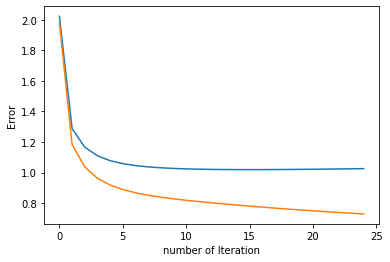

In [ ]:
plt.plot(Et)
plt.plot(E)
plt.xlabel("number of Iteration")
plt.ylabel("Error")
plt.show()

We will observe that now if we increase the no of iteration then Training error will decrease but Test error will be static <br>
After iteration 10 the Test Error have Straight line w.r.t iteration so in no need to increase iteration <br>


## Test the result
we have build the model, and this is the right time to display the acuracy 

In [ ]:
# Using RMSE
Accuracy=0
n=len(TrainSet)
for x in TrainSet:
    i=U[x[0]]
    j=M[x[1]]
    d= sum(USERS[i,:] * MOVIES[j,:])- Rating[x]
    Accuracy += d**2
print("RMSE :- ",(Accuracy/n)**(0.5))

RMSE :-  0.7298772309326714483


In [ ]:
# Using RMSE
Accuracy=0
predictR=[]
n=len(TestSet)
for x in TestSet:
    i=U[x[0]]
    j=M[x[1]]
    d= sum(USERS[i,:] * MOVIES[j,:])- Rating[x]
    predictR.append(sum(USERS[i,:] * MOVIES[j,:]))
    Accuracy += d**2
print("RMSE :- ",(Accuracy/n)**(0.5))

RMSE :-  1.0261192148698480144


In [ ]:
predictR[0:10]

[4.6878777244913579746,
 4.109606450721735976,
 4.4173858902949238716,
 4.064076780953337172,
 3.5413016873666201673,
 4.7705763037815480053,
 4.8544739085893023438,
 4.3303648177011760576,
 4.5787982041133173357,
 4.4662081676622471397]

## Lets Recommend some movie for a user


we choose random user and Reccomend the 10 movie on the basis of there interest

In [ ]:

P=[]
i=U[random.choice(User)]
for x in range(9724):
    j=M[Movie[x]]
    P.append(sum(USERS[i,:] * MOVIES[j,:]))
Result=pd.DataFrame({"movie":Movie,"Prediction":P})
bins = pd.cut(Result['Prediction'], [0, 1.5, 2.5, 3.5, 4.5,6],labels=[1,2,3,4,5])
Result["rating"]=bins
    

In [ ]:
Result.sample(10)


,movie,Prediction,rating
5002,6245,3.106552,3
666,743,2.840016,3
7885,184349,2.772031,3
9268,193567,1.308033,1
4067,4849,4.037183,4
6972,45726,2.617487,3
9556,31698,0.954080,1
4056,4833,3.535178,4
6985,111384,1.276347,1
6768,165103,3.770534,4


**We will find movie which is maximum Rated by user and recommend to that User**

In [ ]:
len(USERS)

610

In [ ]:
len(MOVIES)

9724

In [ ]:

DATAMOVIE = {}
for i in range(9724):
    DATAMOVIE[i] = list([Movie[i]]) + list(MOVIES[M[Movie[i]]]) 

In [ ]:
DATAUSER = {}
for i in range(610):
    DATAUSER[i] = list([User[i]]) + list(USERS[U[User[i]]])

In [ ]:
ufinal = pd.DataFrame(list(DATAUSER.items()))
mfinal = pd.DataFrame(list(DATAMOVIE.items()))

In [ ]:
ufinal.to_csv('USER.csv',index=False)
mfinal.to_csv('MOVIES.csv',index=False)

In [ ]:
mfinal.sample(10)

,0,1
5487,5487,"[6984, 0.67318620453079499043, 0.7703400351021..."
8216,8216,"[56003, 0.5803298317490104103, 0.5068543923449..."
3545,3545,"[4184, 0.53184509856384741235, 0.6146619579008..."
5066,5066,"[71867, 0.30149167860076579283, 0.605996709902..."
2195,2195,"[2575, 0.5425221050365490045, 0.88795620317272..."
5686,5686,"[7235, 0.57546092407306995327, 0.6533161046781..."
8369,8369,"[155892, 0.21282595841233919398, 0.22499934779..."
4946,4946,"[104457, 0.6885540534310077527, 0.396758044363..."
9352,9352,"[63082, 0.75784062572178047533, 0.599533830770..."
8277,8277,"[89492, 0.7265918003286484146, 0.4398185577963..."


In [ ]:
list([Movie[2980]]) + list(MOVIES[M[Movie[2980]]])

[3513,
 0.5350202597028164335,
 0.2733523280645941586,
 0.6498551612264985615,
 0.6423488588238051362,
 0.28710091261982649224]